# Submission information

In future labs (which will be assessed), you will be asked to submit the notebook file in Canvas. When you do, please fill in your group number and names in the table below.

|  Information  |  Your reply  |
|-----------|:---------------------------------|
| **Group** | *Report your group number here* |
| **Group member 1** | *Fill in your names here* |
| **Group member 2** | *Fill in your names here* |

# Introduction

The labs for Basic Machine Learning are in Python 3.5, a powerful interpreted language. Python is being commonly used in machine learning research, as it is fast, portable, has a clean syntax and sports a large collection of scientific software libraries. In this lab, you get an opportunity to familiarise yourself with the software and with the way the labs are set up, as well as with model performance evaluation. This first lab is not graded, but don't hesitate to ask for feedback or help if you get stuck.

In order to deal with the mathematics that we deal with in this course, we make regular use of a few python libraries:

* numpy, which allows us to work with vectors and matrices
* scipy, which gives us access to a variety of scientific algorithms
* matplotlib, which allows us to plot our results

Notice that when applying machine learning to practical problems, you will probably want to use more high-level libraries such as scikit learn and tensorflow. However, as the purpose of this course is to familiarise you with what's happening behind the scenes, here we focus more on implementing and modifying algorithms, rather than applying canned versions of the same.

For this introduction, we will run our practical exercises within a "*notebook*" like this one: an interactive web page that integrates both code and text, allowing us to combine the code with documentation. In this case, you will edit this notebook to write your code and provide answers to the questions. Much of the documentation for python and its libraries can be found online. In particular, you should be able to do the exercises described in this document with the information available at http://scipy.org/docs.html
    
Before we start, let's load the libraries that we will need for this exercise. You need to execute ("run") the code in the cell in order for the code in the cells below to work. 

In [1]:
# The following line makes sure that when we plot stuff it shows up in the notebook
# comment it out for the plots to show in a different window.
#%matplotlib inline 

import scipy.stats as stats     # Statistics module
import numpy as np              # Module for, among others, matrix operations
import matplotlib.pyplot as plt # Plotting
#import scipy.io as sio         # We don't use this, but it's good to know about: 
                                # allow for the import from, and export to, Matlab files
       


## Example question

**Question 1**

What is the square root of two?

In [2]:
# Your answer comes here 
s=np.sqrt(2.)
print("The square root of 2 is:",s)

The square root of 2 is: 1.4142135623730951


The square root is computed using the numpy library in this case. Using numpy rather than the Math library for such trivial things is useful, because it allows us to deal with infinity in a principled manner. For example:

In [3]:

with np.errstate(divide='ignore'):
    print("The natural logarithm of zero is:", np.log(0))
    print("... and the exponent of that logarithm is:", np.exp(np.log(0)))

import math

print("Now, using the math library, ... ", end="")
try:
    print("this gives an exception:", math.log(0))
except:
    print("well, that didn't work.")

#Q2_END

The natural logarithm of zero is: -inf
... and the exponent of that logarithm is: 0.0
Now, using the math library, ... well, that didn't work.


# Basic stuff

Let's start by playing around a little with some data. Start by loading the variables saved in the file "``data.npz``". This can be done using the "**numpy.load**" command. This file contains multible variables, which can be accessed as elements of a dictionary structure. In the following, we will refer to these variables by their key in the file, so for example, $v$ refers to the vector that you can access as ``data['v']`` if you called your dictionary "data".

Answer the following questions:

1. What is the order of $v$?
1. Compute the 2-norm of $v$, $|v|^2$ . Notice that v is relatively large, which can lead to out-of-memory errors if you're not careful. Check out the numpy ``dot()`` function.
1. use ``%timeit`` to check how long the computation takes, and report the results
1. How many elements of v are larger than 1? How many are larger than $2, 3,\dots,5$?

## Playing with data

Have a look at the code below and try to make sure you understand it.

In [5]:
d = np.load("data.npz")

print("'data.npz' is a file that contains a number of variables, called:")
for k in d.keys():
    print('  ', k, 'which is of size',d[k].shape)
    
# Let us play with vector 'v'    
v = d['v']

print("  The order of V", v.shape)
print("  The two-norm of v", np.sqrt(v.T.dot(v)))

print("Timing inner product")
%time v.T.dot(v)

# The following code counts how many elements in v are larger than t (and times how long it takes to do that)
# This relies on "list comprehension," which makes for some very compact code but may require some getting used to
%time for t in [1,2,3,4,5]: print("  Number of elements >",t,":",len([x for x in v if x>t]))

    
# Here are some other ways to do the same:
# Using numpy vector operations
%time for t in [1,2,3,4,5]: print("  Using numpy, the number of elements >",t,":",np.sum(v>t))

# using a standard for loop:

def countLargerThan(t):
    count=0
    for x in v:
        if x>t:
            count+=1
    return count

def countAll():
    for t in range(1,6):
        print("  Using for loops, the number of elements >",t,":",countLargerThan(t))
%time countAll()

'data.npz' is a file that contains a number of variables, called:
   a which is of size (300, 1)
   v2 which is of size (1000, 1)
   b which is of size (300, 1)
   l which is of size (1000, 1)
   v which is of size (200000, 1)
  The order of V (200000, 1)
  The two-norm of v [[446.56104741]]
Timing inner product
CPU times: user 1.32 ms, sys: 1.44 ms, total: 2.76 ms
Wall time: 375 µs
  Number of elements > 1 : 31834
  Number of elements > 2 : 4472
  Number of elements > 3 : 262
  Number of elements > 4 : 9
  Number of elements > 5 : 0
CPU times: user 1.25 s, sys: 615 ms, total: 1.86 s
Wall time: 1.08 s
  Using numpy, the number of elements > 1 : 31834
  Using numpy, the number of elements > 2 : 4472
  Using numpy, the number of elements > 3 : 262
  Using numpy, the number of elements > 4 : 9
  Using numpy, the number of elements > 5 : 0
CPU times: user 4.76 ms, sys: 605 µs, total: 5.36 ms
Wall time: 4.07 ms
  Using for loops, the number of elements > 1 : 31834
  Using for loops, the num

## Plotting

Now its your turn. 

**Question 3** Plot, in the range $[-5\dots 5]$, the Gaussian PDFs with parameters $(\mu=0,\sigma=1), (\mu=0, \sigma=2), (\mu=0, \sigma=3)$. Use the functions *plt.plot*, *stats.norm.pdf* and *plt.legend*


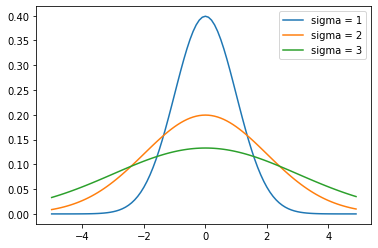

In [10]:
x = np.arange(-5,5,0.1)
plt.plot(x, stats.norm.pdf(x, loc=0, scale=1), label="sigma = 1")
plt.plot(x, stats.norm.pdf(x, loc=0, scale=2), label="sigma = 2")
plt.plot(x, stats.norm.pdf(x, loc=0, scale=3), label="sigma = 3")
plt.legend()

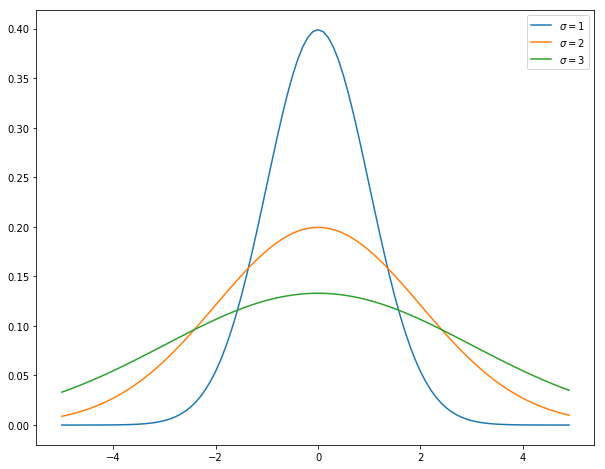

In [21]:
# Your answer comes here 

# I often leave output of my own code below the answer space, to give you an idea of the expected answer. 
# Running your own code will replace it. 

## Playing with matrices and Python

**Question 4** Plot a normalised histogram of the elements in vector ``v2`` using 20 bins, and superimpose a plot, in the range $[−5, \dots , 5]$ of the Gaussian distribution with the mean and variance of the data. Use the built-in functions to compute these. In particular, use **np.mean** and **np.cov** to fit the parameters to the data.

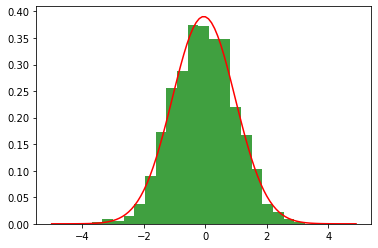

In [20]:
x = np.arange(-5,5,0.1)
v2 = d["v2"].flatten()
m = np.mean(v2)
s = np.cov(v2)
plt.hist(v2, 20, density=1, facecolor='green', alpha=0.75)
plt.plot(x,stats.norm.pdf(x,m,s),"red")




(1000,)
-0.05312146691764375 1.0103423336917583
-0.05312146691764375 1.021813444694402


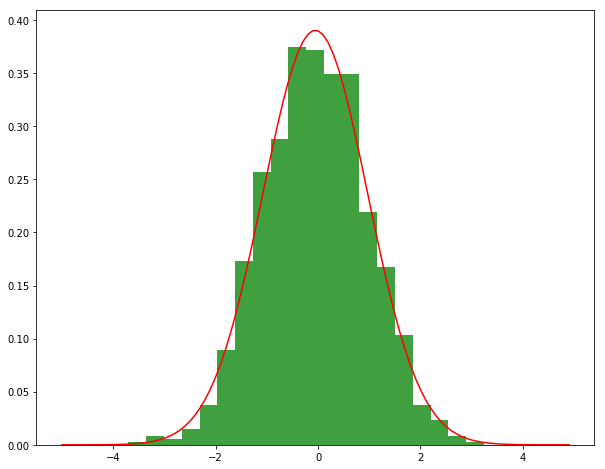

In [8]:
# Your code comes here

Get information on the *np.cov* function using the **help** function. As we will see later, this function does not provide you with the maximum likelihood estimator (MLE) of the parameters. For the Gaussian function, the MLE are 

$$\boldsymbol{\mu} = \frac{\sum_{n=1}^N \mathbf{x}_n}{N}$$ 

and

$$\boldsymbol{\Sigma} = \frac{\sum_{n=1}^N (\mathbf{x}_n-\boldsymbol{\mu})^2}{N}$$

**Question 5** Write your own code to compute these parameters and compare the values you obtain to those returned by the built-in function. How does your implementation compare in terms of execution speed?
    

In [21]:
def compute():
    mu = v2.sum()/v2.shape[0]
    vp = (v2-mu)**2
    var = vp.sum()/float(v2.shape[0])
    return mu,var

%time print(compute())
print (m,s)

(-0.05312146691764375, 1.020791631249708)
CPU times: user 0 ns, sys: 1.47 ms, total: 1.47 ms
Wall time: 1.7 ms
-0.05312146691764375 1.021813444694402


In [13]:
# Your code comes here

(-0.05312146691764375, 1.0218134446944025)
CPU times: user 154 µs, sys: 7 µs, total: 161 µs
Wall time: 104 µs
-0.05312146691764375 1.021813444694402


# More advanced things...

**Question 6** Load the dataset in ``data-2class.npz``. This file contains a set of 2-dimensional points $d$, and a corresponding set of labels $l$

1. Create a 2D scatterplot of $d$, using red for the elements with corresponding label 0, and blue for $l_i=1$
1. Draw a straight line separating the two classes. That is, figure out by hand how that line should look and plot it.
1. Fit two 2D Gaussian distributions, to the points with label $l_i=0$ and $l_i=1$. 
1. Create a heatmap of these distributions, and overlay a scatterplot of the data. 



In [22]:
# Our own implementation of the multivariate Gaussian Distribution
# We will re-use and come back to this code later in the course.
class Gauss:
    """Class for computing the probability density function of a Gaussian distribution with given 
    mean vector and covariance matrix, at point x"""
    
    def __init__(self, mu, sigma):
        """Initialise a distribution with mean mu and covariance sigma
        
        Precompute and store everything that is not dependent
        on the datapont, so as to keep things efficient"""
        D = mu.size
        
        self.mu = mu
        self.icov = np.linalg.inv(sigma)
        sign,ld = np.linalg.slogdet(sigma)
        if sign != 1:
            print("Sign=",sign)
        
        self.lognum = D*np.log(2*np.pi) + ld
                            
    def logprob(self,x):
        """return log(p(x))"""
        d = x-self.mu
        return -.5 * (self.lognum + np.dot(np.dot(d,self.icov),d))
    
    def prob(self,x):
        """return p(x)"""
        return np.exp(self.logprob(x))     
    

d
l


<ipython-input-35-0f38c85a4260>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xx,yy,p,cmap='seismic')


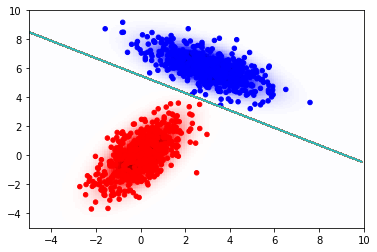

In [35]:
data = np.load("data-2class.npz")
for k in data.keys():
    print(k)
d = data['d']
l = data['l'].flatten()
    
    
# Using matplotlib to plot a heatmap
from matplotlib import mlab

# Your answer to Question 6 comes here

def plotCloud(xx,yy,m0,c0,m1,c1):
    p = np.zeros(xx.shape)
    g0 = Gauss(m0,c0)
    g1 = Gauss(m1,c1)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            p[i,j] = g0.prob([xx[i,j],yy[i,j]]) -  g1.prob([xx[i,j],yy[i,j]])

    plt.pcolor(xx,yy,p,cmap='seismic')
    plt.xlim([-5,10])
    plt.ylim([-5,10])

def line(x):
    return -0.6*x + 5.5
    

xx,yy = np.mgrid[-5:10:.1,-5:10:.1] #make grid from -5 to 10 with 0.1 step size

d0 = d[l==0,:]
d1 = d[l==1,:]

m0 = np.mean(d0,axis=0)
c0 = np.cov(d0,rowvar=0)
m1 = np.mean(d1,axis=0)
c1 = np.cov(d1,rowvar=0)

#print mean0, mean1
#print cov0, cov1

colours = [ [ 'r', 'b' ][int(x)] for x in np.nditer(l)] 
plotCloud(xx,yy,m0,c0,m1,c1)
plt.scatter(d[:,0],d[:,1],20,colours)
plt.plot(xx,line(xx))
plt.show()

d
l


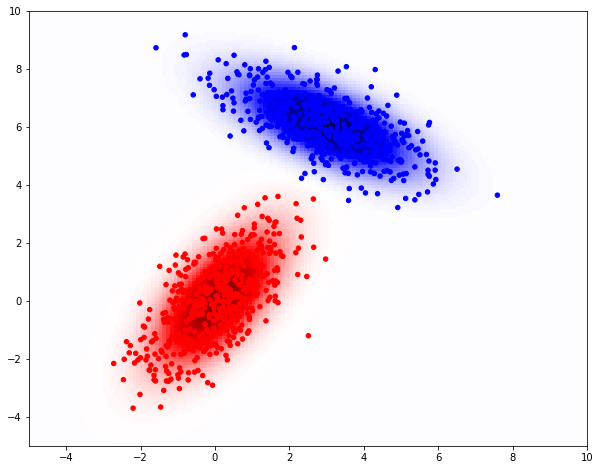

In [34]:
data = np.load("data-2class.npz")
for k in data.keys():
    print(k)
d = data['d']
l = data['l'].flatten()
    
    
# Using matplotlib to plot a heatmap
from matplotlib import mlab

# Your answer to Question 6 comes here